In [1]:
#import pandas,numpy , random and matplotlib libraries to start cleaning and visualize data

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

## Take a look at the Data

read_csv  is used to read the csv file in python

In [4]:
df = pd.read_csv('C:\\Users\\Mahmoud\\Downloads\\tamer_dataset.csv')
# we have used read_csv 
#the backslash "\" is a special character, also called the "escape" character. 
#It is used in representing certain whitespace characters

df.head()

# .head() is used to read the first 5 rows in your dataframe

,Number,City,Gender,Age,Income,Illness
0,1,Cairo,Male,41,40367,No
1,2,Cairo,Male,54,45084,No
2,3,Cairo,Male,42,52483,No
3,4,Cairo,Male,40,40941,No
4,5,Cairo,Male,46,50289,No


We ued .shape[0] to  find the number of rows in the dataset.

In [5]:
df.shape[0]

150000

We used .unique() to get the unique values in 'City' and 'Gender' Column in our dataset

In [9]:
df['City'].unique()

array(['Cairo', 'Fayoum', 'Aswan', 'Menofia', 'Luxor', 'Alexandria',
       'Matrouh', 'Assuit'], dtype=object)

In [6]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

we need now to see the distributions of `Income`, and `Age` variables by using histogram 

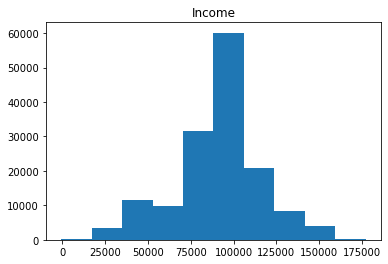

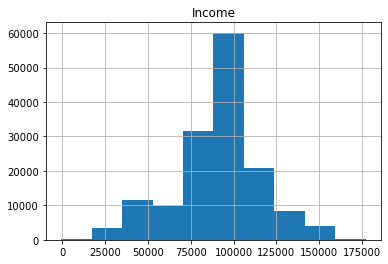

In [14]:
df.hist("Income",grid=False);
df.hist("Income",grid=True);

# we can see the diffenece if we changed the grid from False to True

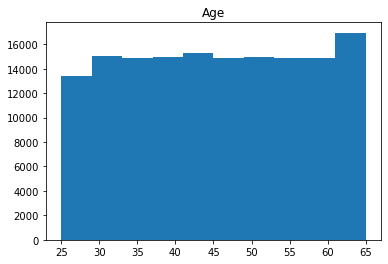

In [8]:
df.hist('Age',grid=False);

We use isna() to detect missing values in the dataset.

In [16]:
df.isna().sum()

Number     0
City       0
Gender     0
Age        0
Income     0
Illness    0
dtype: int64

## Descriptive Statistics

a. Which Column/Feature is considered Quantitative data ? is it Continous or Discrete ?

> Age & Income, Both are Continous

b. Which Column/Feature is considered Categorical data ? is it Ordinal or Nominal ?

> City, Gender & Illness. All of them are considered Nominal

now we will calculate the following statistics for the Quantitative data:
- Median
- Mod
- Range
- IQR
- std

In [5]:
# .mean() is used to calculate the mean for Quantitative data 
df.Income.mean()

91252.79827333333

In [17]:
# Median
df.Income.median()

93655.0

In [18]:
# Mode
df.Income.mode()

0    98410
Name: Income, dtype: int64

In [19]:
# Mode
df.Income.value_counts().index[0]

98410

In [20]:
# Range
df.Income.max()-df.Income.min()

177811

the first quartile (Q1) is equal to the median of the n smallest entries
the third quartile (Q3) is equal to the median of the n largest entries
the second quartile(Q2) is the same as the ordinary median.

We use np.percentile to calculate Q1,Q2 and Q3 
Then WE calculate Interquartile Range (IQR) , also called as midspread or middle 50%, or technically H-spread is the difference between the third quartile (Q3) and the first quartile (Q1). It covers the center of the distribution and contains 50% of the observations. IQR = Q3 – Q1

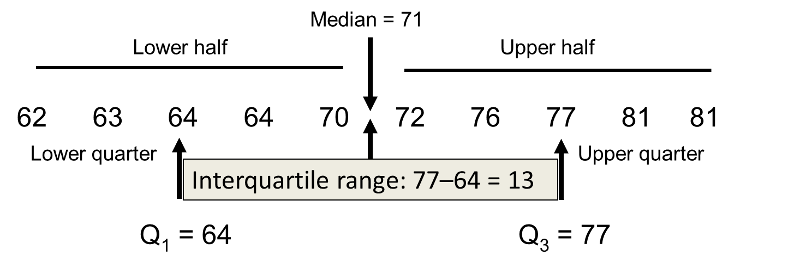

Uses :

The interquartile range has a breakdown point of 25% due to which it is often preferred over the total range.
The IQR is used to build box plots, simple graphical representations of a probability distribution.
The IQR can also be used to identify the outliers in the given data set.
The IQR gives the central tendency of the data.
Decision Making

The data set has a higher value of interquartile range (IQR) has more variability.
The data set having a lower value of interquartile range (IQR) is preferable.



In [21]:
# IQR
Q1=np.percentile(df.Income,[25])[0]
Q3=np.percentile(df.Income,[75])[0]
IRQ=Q3-Q1
IRQ

23651.25

In [24]:
# we can calculate both Q1 and Q3 with one line of codeing 
np.percentile(df.Income,[25,75])

array([ 80867.75, 104519.  ])

In [43]:
#IQR = Q1-Q3

104519 - 80867.75

23651.25

In [45]:
# We can also use np.quantile to calculate Q1 and Q3
np.quantile(df.Income,[0.25,0.75])

array([ 80867.75, 104519.  ])

In [25]:
# to calculate the standard deviation for specific column in our dataframe we use df.column_name.std()
df.Income.std()

24989.500948355126

df.describe().column_name will give us summary for count,mean,std,min,Q1,Q2,Q3, max and data type of the column

In [26]:
df.describe().Income

count    150000.000000
mean      91252.798273
std       24989.500948
min        -654.000000
25%       80867.750000
50%       93655.000000
75%      104519.000000
max      177157.000000
Name: Income, dtype: float64

## Probability

to calculate the  proportion of persons that are ill and the proportion of persons that are not ill we use .mean() 

In [28]:
#ill
(df.Illness == 'Yes').mean()

0.08092666666666666

In [29]:
#not ill
(df.Illness == 'No').mean()

0.9190733333333333

We can also use ,shape[0] to calculate the number of ill persons and divide it by total number of rows

In [10]:
p_i = df[df.Illness == 'Yes'].shape[0] / df.shape[0]
p_i

0.08092666666666666

In [11]:
df[df.Illness == 'No'].shape[0] / df.shape[0]

0.9190733333333333

now we can use .query to calculate the probability of Male

In [31]:
df.query("Gender == 'Male'").shape[0]/df.shape[0]

0.5586666666666666

In [30]:
df.head()

,Number,City,Gender,Age,Income,Illness
0,1,Cairo,Male,41,40367,No
1,2,Cairo,Male,54,45084,No
2,3,Cairo,Male,42,52483,No
3,4,Cairo,Male,40,40941,No
4,5,Cairo,Male,46,50289,No


The proportion of persons that are from 'Cairo'

In [32]:
df.query("City == 'Cairo'").shape[0]/df.shape[0]

0.13138

The proportion of persons that have `income` from `50000` to `100000`

In [33]:
df.query("Income > 50000 and Income <= 100000  ").shape[0]/df.shape[0]

0.5659533333333333

## Conditional Probability

 Given that a person was in `Aswan` , what is the probability that he/she is `ill`?

In [34]:
df_ASW = df[df.City == 'Aswan'] #Selecting Aswan City from Main df
df_ASW[df_ASW.Illness == 'Yes'].shape[0]/df_ASW.shape[0]

0.07981848133528113

In [35]:
df_ASW.shape

(32173, 6)

We can use the following 2 steps to calculate the same
p(ill|NY)=P(ill & NY)/P(NY)

In [36]:
df.query("Illness == 'Yes' and City == 'Aswan' ").shape[0]/df.shape[0]

0.01712

In [37]:
df.query("City == 'Aswan'").shape[0]/df.shape[0]

0.21448666666666666

In [38]:
0.0268/0.33538

0.07990935655077822

Given that a person is `Male` , what is the probability that he is `ill`?

In [39]:
df_male = df[df.Gender == 'Male']

In [40]:
df_male[df_male.Illness == 'Yes'].shape[0]/df_male.shape[0]

0.08124105011933175

Given that a person is `Female` , what is the probability that she is `ill`?

In [44]:
df_female = df[df.Gender == 'Female']
df_female[df_female.Illness == 'Yes'].shape[0]/df_female.shape[0]

0.08052870090634441

Given that a person is `male and from Luxor`, what is the probability that he is `ill`

In [45]:
df2 = df[(df['Gender'] == 'Male') & (df['City'] == 'Luxor')]
df2[df2['Illness'] == 'Yes'].shape[0] / df2.shape[0]

0.08351504579153947

## Bayes rule

Bayes’ theorem (alternatively Bayes’ law or Bayes’ rule) has been called the most powerful rule of probability and statistics. It describes the probability of an event, based on prior knowledge of conditions that might be related to the event.

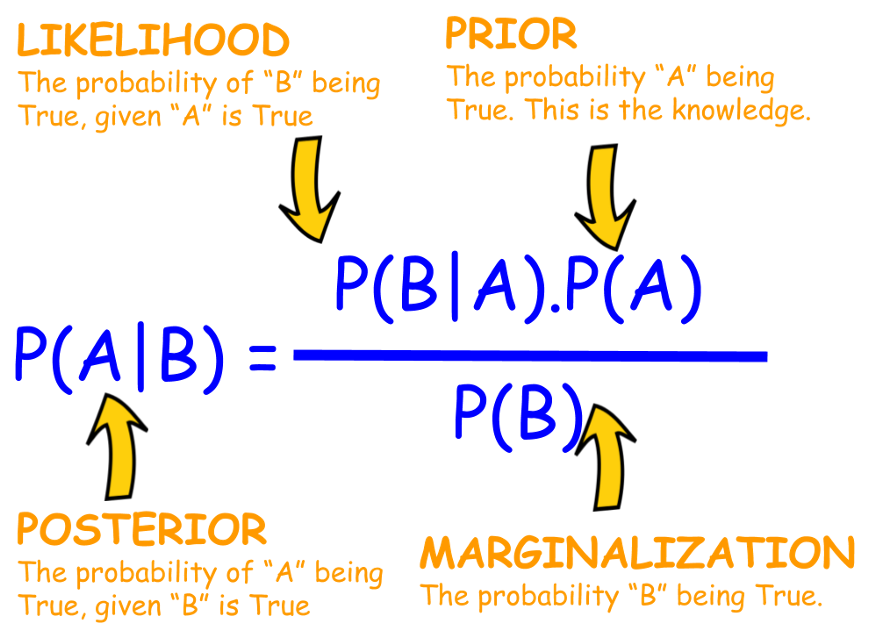

For example, if a disease is related to age, then, using Bayes’ theorem, a person’s age can be used to more accurately assess the probability that they have the disease, compared to the assessment of the probability of disease made without knowledge of the person’s age.

It is a powerful law of probability that brings in the concept of ‘subjectivity’ or ‘the degree of belief’ into the cold, hard statistical modeling. Bayes’ rule is the only mechanism that can be used to gradually update the probability of an event as the evidence or data is gathered sequentially.

Example: What is the probability that a person is from `Cairo` given this person is `ill`

P(Cairo|Ill) = P(Ill|Cairo).P(Cairo) / P(ILL)

In [50]:
df_c = df[df['City'] == 'Cairo']
p_i =(df.Illness == 'Yes').mean()
p_C = df_c.shape[0] / df.shape[0]
p_i_C = df_c[df_c['Illness'] == 'Yes'].shape[0]/df_b.shape[0]
p_C_i = (p_i_C * p_C) / p_i
p_C_i

0.13287750226542547

Or we can calculate it direct from Data

In [53]:
df_ill = df[df.Illness == "Yes"]
df_ill[df_ill.City == "Cairo"].shape[0]/df_ill.shape[0]

0.1328775022654255

Example2: What is the probability that a person is `female`, given this person is `ill`

            P(femal|Ill) = P(female).P(Ill|female) / P(ILL)

In [54]:
df_f = df[df.Gender == 'Female']
p_f = df_f.shape[0] / df.shape[0]
p_i_f = df_f[df_f.Illness == 'Yes'].shape[0]/df_f.shape[0]
p_f_i = (p_i_f * p_f) / p_i
p_f_i

0.4391630282560343

In [55]:
df_ill = df[df.Illness == "Yes"]
df_ill[df_ill.Gender == "Female"].shape[0]/df_ill.shape[0]

0.43916302825603426